<a href="https://colab.research.google.com/github/yamenetoo/ABC-machine-learning/blob/main/SklearnPreprocessingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preprocessing in  machine learning and statistical model refers to the steps and techniques applied to raw data before it is fed into a machine learning model. The purpose of preprocessing is to transform the raw data into a format that is more suitable and informative for the machine learning algorithm. It involves several tasks and techniques, including:

1. **Data Cleaning:**
   - Handling missing values by imputation or removal.
   - Dealing with duplicate records.
   - Correcting errors or inconsistencies in the data.

2. **Data Transformation:**
   - Standardizing or normalizing numerical features to a common scale.
   - Encoding categorical variables into numerical representations.
   - Creating new features or feature engineering.
   - Handling outliers or extreme values.

3. **Data Reduction:**
   - Dimensionality reduction techniques like Principal Component Analysis (PCA).
   - Feature selection to retain the most relevant features.

4. **Data Splitting:**
   - Splitting the dataset into training and testing sets for model evaluation.
   - Optionally, creating validation sets for hyperparameter tuning.

5. **Handling Imbalanced Data:**
   - Addressing class imbalance through techniques like oversampling or undersampling.

6. **Feature Scaling:**
   - Ensuring that numerical features have similar scales to prevent certain features from dominating due to their magnitude.

7. **Normalization:**
   - Transforming features to follow a normal distribution, if necessary.

8. **Text Processing:**
   - Tokenizing and vectorizing text data for natural language processing tasks.
   - Handling stop words and stemming.


Preprocessing is a crucial step in the machine learning pipeline as the quality of the input data significantly impacts the performance and generalization ability of the models. The specific preprocessing steps depend on the nature of the data and the requirements of the chosen machine learning algorithm.

#1.Data Cleaning

##1.1 Imputation of missing values

Imputation of missing values is a statistical technique used to estimate and fill in missing data points in a dataset. When a dataset contains missing values, it can affect the accuracy and reliability of statistical analyses and machine learning models. Imputation helps to address this issue by providing estimated values for the missing data.

There are various methods for imputing missing values, and the choice of method often depends on the nature of the data and the underlying assumptions. Some common imputation techniques include:

1. **Mean/Median Imputation:** Replace missing values with the mean or median of the observed values in the variable. This method is simple but assumes that the missing values are missing completely at random.

2. **Mode Imputation:** For categorical variables, you can replace missing values with the mode (most frequent category) of the observed values.

3. **Linear Regression Imputation:** Use linear regression models to predict missing values based on other variables in the dataset.

4. **K-Nearest Neighbors (KNN) Imputation:** Estimate missing values by considering the values of their k-nearest neighbors in the dataset.

5. **Multiple Imputation:** Create multiple imputed datasets by generating several sets of plausible values for the missing data. This method accounts for the uncertainty associated with imputation.

6. **Interpolation and Extrapolation:** For time-series data, missing values can be estimated by interpolating between observed values or extrapolating based on the trend.

It's important to note that imputation should be performed cautiously, and the chosen method should be appropriate for the specific context of the data. Additionally, imputed values introduce a level of uncertainty, and this uncertainty should be considered in subsequent analyses or modeling. It's always recommended to assess the impact of imputation on the validity of the results and to report any imputation procedures performed on the dataset.

###1.1.1 Simple Imputer


The `SimpleImputer` class is a part of scikit-learn, **bold text**, and it is used for handling missing values in a dataset. It provides straightforward strategies for imputing or filling in these missing values.

Here are the details of its functionalities:

1. **Basic Strategies:**
   - **Constant Value Imputation:** You can use a constant value to replace all missing values in the dataset. This is useful when you want to fill missing values with a specific predetermined value.

   - **Statistics-based Imputation:** You can impute missing values with the statistics (mean, median, or most frequent value) of the respective columns where the missing values are present. This is beneficial when you want to replace missing values with a measure of central tendency of the observed values in that column.

2. **Handling Different Encodings:**
   - The `SimpleImputer` class is flexible and can handle different encodings for missing values. It recognizes various representations of missing values, such as `np.nan`, `None`, or a custom placeholder.

 `SimpleImputer` is a convenient tool for dealing with missing data by providing simple yet effective strategies to replace those missing values. Depending on your specific needs, you can either replace missing values with a constant or use statistical measures based on the columns where the missing values occur. This flexibility makes it a valuable component in preprocessing data before applying machine learning algorithms.

In [1]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 2], [np.nan, 3], [7, 6]])
X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))

[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


In [8]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit([[1, 2], [np.nan, 3], [7, 6]])
X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))

[[4. 2.]
 [6. 3.]
 [7. 6.]]


In [7]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit([[1, 2], [np.nan, 3], [7, 6]])
X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))

[[1. 2.]
 [6. 2.]
 [7. 6.]]


###1.1.2 Iterative Imputer
The `IterativeImputer` class is a more advanced technique for handling missing values compared to the `SimpleImputer`. Instead of relying on basic statistics or constant values, the `IterativeImputer` takes a more sophisticated approach by modeling each feature with missing values as a function of the other features in the dataset.

Here's how the `IterativeImputer` works:

1. **Feature Modeling:**
   - For each feature column that has missing values, the `IterativeImputer` treats that column as the output variable (y) and uses the other feature columns as input variables (X).
   
2. **Iterative Process:**
   - In an iterated round-robin fashion, the algorithm fits a regressor on the known values of the output variable (X, y). The regressor is then used to predict the missing values of the output variable.
   
   - This process is repeated iteratively for each feature with missing values, and the entire iteration is repeated for a specified number of rounds (`max_iter`).

3. **Final Imputation:**
   - The results from the final round of imputation are then returned as the imputed dataset.

the `IterativeImputer` considers the relationships between features and leverages machine learning regression models to estimate and impute missing values. This iterative approach allows the algorithm to refine its estimates over multiple rounds, potentially capturing complex dependencies within the data. It is a powerful tool when the relationships between features are not straightforward and simple imputation methods may not capture the underlying patterns in the data effectively.

In [9]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])
X_test = [[np.nan, 2], [6, np.nan], [np.nan, 6]]
# the model learns that the second feature is double the first
print(np.round(imp.transform(X_test)))

[[ 1.  2.]
 [ 6. 12.]
 [ 3.  6.]]


###1.1.3  Nearest neighbors Imputer
The `KNNImputer` class is designed to handle missing values through the k-Nearest Neighbors (KNN) approach. This technique imputes missing values by considering the values of the nearest neighbors. Here are the key details:

1. **Distance Metric:**
   - By default, the imputer uses a Euclidean distance metric that supports missing values, called `nan_euclidean_distances`, to find the nearest neighbors. This metric considers the distances between points even when some features have missing values.

2. **Imputation Process:**
   - For each missing feature, the imputer identifies the k-nearest neighbors that have a value for that feature.
   
   - The missing feature is then imputed using either the uniform average or a weighted average of the values of the neighbors. The weighting can be based on the distance to each neighbor.

3. **Handling Multiple Missing Features:**
   - If a sample has more than one feature missing, the neighbors for that sample can vary depending on the specific feature being imputed.

4. **Handling Insufficient Neighbors:**
   - When the number of available neighbors is less than `n_neighbors` and there are no defined distances to the training set, the training set average for that feature is used for imputation.

   - If there is at least one neighbor with a defined distance, the imputer uses the weighted or unweighted average of the remaining neighbors for imputation.

5. **Handling Features Always Missing in Training:**
   - If a feature is consistently missing in the training set, it is removed during the transformation.

the `KNNImputer` class is a powerful tool for imputing missing values by leveraging the information from the nearest neighbors. It provides flexibility in terms of handling missing features and dealing with situations where the number of neighbors is insufficient. The snippet below demonstrates how to use it to replace missing values with the mean feature value of the two nearest neighbors for samples with missing values.

In [10]:
import numpy as np
from sklearn.impute import KNNImputer
nan = np.nan
X = [[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]]
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

##1.2 Dealing with duplicate records
To drop duplicate data in row data, we can use the `drop_duplicates` method provided by pandas, which is a widely-used library for data manipulation and analysis.

Assuming you have a DataFrame named `df`:

```python
import pandas as pd

# Create or load your DataFrame (df)

# Drop duplicates based on all columns
df_no_duplicates = df.drop_duplicates()

# Drop duplicates based on specific columns
# Example: Keep the first occurrence of duplicates based on 'column_name'
df_no_duplicates_specific_columns = df.drop_duplicates(subset=['column_name'])

# Inplace modification (modifies the original DataFrame)
df.drop_duplicates(inplace=True)
```


- `drop_duplicates()`: Removes all rows where all columns are identical. This keeps the first occurrence of each set of duplicates.
- `drop_duplicates(subset=['column_name'])`: Drops duplicates based on specific columns. You can replace `'column_name'` with the actual name of the column you want to consider.

Remember to adjust the code according to our specific DataFrame and the columns you want to use for identifying duplicates. The `inplace=True` parameter modifies the original DataFrame; otherwise, a new DataFrame with duplicates removed is returned.



In [15]:
import pandas as pd

data = {'Name': ['Alice', 'Bob', 'Alice', 'Charlie', 'Bob'],
        'Age': [25, 30, 25, 35, 30],
        'City': ['New York', 'San Francisco', 'New York', 'Los Angeles', 'San Francisco']}
df = pd.DataFrame(data)

print("Original DataFrame:")
df

Original DataFrame:


,Name,Age,City
0,Alice,25,New York
1,Bob,30,San Francisco
2,Alice,25,New York
3,Charlie,35,Los Angeles
4,Bob,30,San Francisco


In [16]:
df_no_duplicates = df.drop_duplicates()

print("\nDataFrame after dropping duplicates:")
df_no_duplicates


DataFrame after dropping duplicates:


,Name,Age,City
0,Alice,25,New York
1,Bob,30,San Francisco
3,Charlie,35,Los Angeles


##1.3 Correcting errors, inconsistencies

Correcting errors or inconsistencies in the data is an essential step in the data preprocessing phase. Here are some common techniques and approaches for handling errors and inconsistencies in your data:

1. **Identifying Errors:**
   - Begin by thoroughly exploring and visualizing your dataset to identify potential errors or inconsistencies.
   - Check for outliers, missing values, and unexpected patterns in the data.


3. **Dealing with Outliers:**
   - Identify and handle outliers using statistical methods. Techniques such as Z-score or IQR (Interquartile Range) can be used to detect and address outliers.
   - Decide whether to remove outliers or transform them based on the nature of your data and analysis.

4. **Data Cleaning Techniques:**
   - Use data cleaning techniques such as removing duplicate records using the `drop_duplicates` method in pandas.
   - Standardize or normalize numerical features to a common scale to mitigate the impact of extreme values.

5. **Handling Inconsistent Data:**
   - Correct inconsistencies in categorical data by standardizing the values (e.g., converting all text to lowercase).
   - Address typos and variations in categorical values by using text matching techniques or manually correcting the entries.

6. **Cross-Validation:**
   - Employ cross-validation techniques to detect errors by comparing the results of different folds or subsets of your data.
   - Cross-check data with external sources to validate its accuracy.

7. **Error Correction Plans:**
   - Develop specific error correction plans based on the types of errors identified. For instance, if there are data entry errors, consider creating validation rules or constraints.

8. **Domain Knowledge:**
   - Leverage domain knowledge to identify and correct errors that may not be apparent from statistical analysis alone.

Remember that the specific approach will depend on the nature of the errors and the characteristics of your data. The goal is to ensure that your dataset is accurate, reliable, and suitable for the machine learning or statistical analysis you intend to perform. Regularly reviewing and cleaning your data is essential for maintaining data quality over time.

#2. Data Transformation:



In [ ]:
Standardizing or normalizing numerical features to a common scale.
Encoding categorical variables into numerical representations.
Creating new features or feature engineering.
Handling outliers or extreme values.

##2.1 **Standardizing , Normalizing variabels**

In machine learning operations, standardizing or normalizing numerical features is an essential step to ensure that all features are on the same scale. There are two common methods to achieve this: Standardization and Normalization.

Implementing standardization or normalization helps improve the performance of algorithms that rely on distances or are affected by scale variations, such as many machine learning and clustering algorithms.

###2.1.1 **Standardization**
   In this process, data is transformed to have a mean of 0 and a standard deviation of 1. This means that values are centered around zero and are scaled based on the standard deviation. This type of scaling is applied by subtracting the mean of the data from each value and then dividing the result by the standard deviation.

   Standardization Formula:

   $$X_{\text{standardized}} = \frac{X - \mu_X}{\sigma_X}$$

   Where:

   - $X_{\text{standardized}} $: The standardized value (scaled with a mean of 0 and standard deviation of 1).
   - $ X $: The original value.
   - $\mu_X$: The mean of the values in the data.
   - $\sigma_X$: The standard deviation of the values in the data.



###2.1.2 **Normalization**
   In this process, data is transformed to a specified range, typically between 0 and 1. This type of scaling is applied by subtracting the minimum value from each value and then dividing the result by the difference between the maximum and minimum values.

   Normalization Formula:

   $$X_{\text{normalized}} = \frac{X - \text{min}(X)}{\text{max}(X) - \text{min}(X)}$$

   Where:

   -$X_{\text{normalized}}$: The normalized value (scaled between 0 and 1).
   -$X$: The original value.
   - $\text{min}(X)$: The minimum value in the data.
   -$\text{max}(X)$: The maximum value in the data.

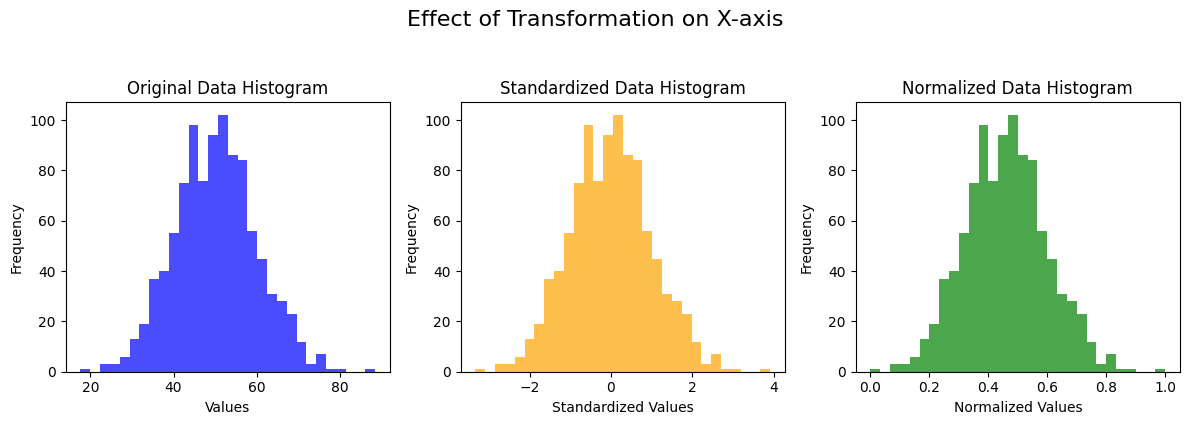

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Generate sample data
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=(1000, 1))

# Plot histogram before transformation
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(data, bins=30, color='blue', alpha=0.7)
plt.title('Original Data Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Standardization
scaler_standard = StandardScaler()
data_standardized = scaler_standard.fit_transform(data)

# Plot histogram after standardization
plt.subplot(1, 3, 2)
plt.hist(data_standardized, bins=30, color='orange', alpha=0.7)
plt.title('Standardized Data Histogram')
plt.xlabel('Standardized Values')
plt.ylabel('Frequency')

# Normalization
scaler_minmax = MinMaxScaler()
data_normalized = scaler_minmax.fit_transform(data)

# Plot histogram after normalization
plt.subplot(1, 3, 3)
plt.hist(data_normalized, bins=30, color='green', alpha=0.7)
plt.title('Normalized Data Histogram')
plt.xlabel('Normalized Values')
plt.ylabel('Frequency')

plt.suptitle('Effect of Transformation on X-axis', y=1.05, fontsize=16)
plt.tight_layout()
plt.show()

##2.2 Encoding categorical variables

Encoding categorical variables into numerical representations is a crucial step in preparing data for machine learning algorithms, as many algorithms require numerical input. Categorical variables are variables that can take on a limited, fixed number of values or categories. These categories can be labels such as colors, cities, or types of fruits.

There are several methods for encoding categorical variables into numerical representations, and the choice of method depends on the nature of the data and the requirements of the machine learning algorithm. Two common methods are:




The goal of encoding categorical variables is to represent the information in a format that machine learning algorithms can understand and effectively use for training models. The choice between label encoding and one-hot encoding depends on the specific characteristics of the data and the requirements of the machine learning task at hand.

###2.2.1 **Label Encoding**
 This method involves assigning a unique numerical label to each category in the categorical variable. Each category is mapped to a corresponding integer, and this encoding is often used when there is an ordinal relationship between the categories. However, it's essential to note that label encoding may introduce unintended ordinal relationships that don't exist in the original data.
   Example:


In [21]:
from sklearn.preprocessing import LabelEncoder

# Sample data with a categorical variable
data = {'Category': ['A', 'B', 'A', 'C', 'B', 'C']}
df = pd.DataFrame(data)
df

,Category
0,A
1,B
2,A
3,C
4,B
5,C


In [22]:
# Using LabelEncoder for ordinal encoding
label_encoder = LabelEncoder()
df['Category_LabelEncoded'] = label_encoder.fit_transform(df['Category'])
df

,Category,Category_LabelEncoded
0,A,0
1,B,1
2,A,0
3,C,2
4,B,1
5,C,2


###2.2.2 **One-Hot Encoding**
 This method creates binary columns for each category and indicates the presence or absence of the category with a 1 or 0, respectively. It's particularly useful when there is no inherent order among the categories, and each category is treated as a separate feature.

   Example:



In [24]:
   from sklearn.preprocessing import OneHotEncoder
   # Using OneHotEncoder for one-hot encoding
   onehot_encoder = OneHotEncoder(sparse=False)
   encoded_features = onehot_encoder.fit_transform(df[['Category']])
   onehot_df = pd.DataFrame(encoded_features, columns=[f'Category_{int(i)}' for i in range(encoded_features.shape[1])])
   df

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Category,Category_LabelEncoded
0,A,0
1,B,1
2,A,0
3,C,2
4,B,1
5,C,2


##2.3 Creating new features, feature engineering

Creating new features, or feature engineering, is the process of generating additional input variables (features) from the existing data to enhance the performance of machine learning models. It involves transforming, combining, or extracting relevant information from the original features to provide more meaningful insights and improve the model's ability to capture patterns and relationships in the data.

Feature engineering is a crucial step in the machine learning pipeline, and it can significantly impact the model's predictive power. Here are some common techniques and concepts related to feature engineering:




Feature engineering requires a deep understanding of the data and the problem domain. It's an iterative process where you continually refine and experiment with new features to improve the model's performance. Effective feature engineering can contribute significantly to model interpretability, accuracy, and generalization to new, unseen data.

###2.3.1 **Polynomial Features:**
 Generating polynomial features involves creating new features as powers or interactions of existing features. For example, if you have a feature $x$ creating polynomial features might include adding $x^2$ or $x*y$ as new features.


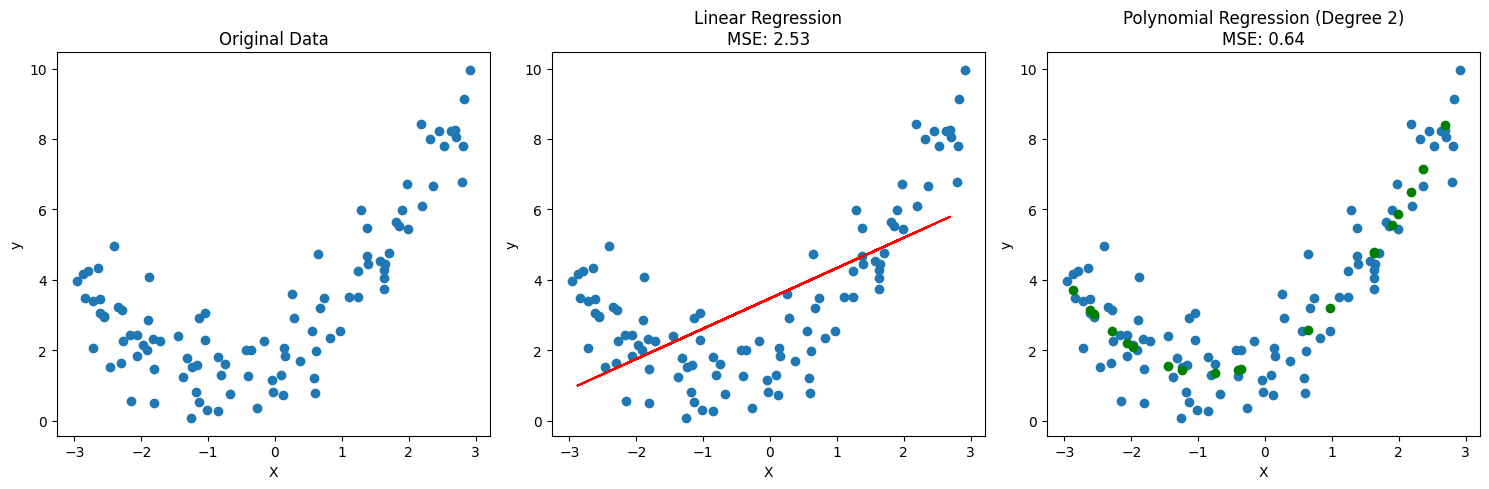

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Create synthetic data
np.random.seed(42)
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Generate polynomial features
degree = 2  # Degree of the polynomial features
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Split the polynomial features into training and testing sets
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the original data
axs[0].scatter(X, y, label='Original Data')
axs[0].set_title('Original Data')
axs[0].set_xlabel('X')
axs[0].set_ylabel('y')

# Fit a linear regression model on the original data
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
axs[1].scatter(X, y, label='Original Data')
axs[1].plot(X_test, y_pred_lin, color='red', label='Linear Regression')
axs[1].set_title(f'Linear Regression\nMSE: {mse_lin:.2f}')
axs[1].set_xlabel('X')
axs[1].set_ylabel('y')

# Fit a polynomial regression model on the polynomial features
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
y_pred_poly = poly_reg.predict(X_poly_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
axs[2].scatter(X, y, label='Original Data')
axs[2].scatter(X_test, y_pred_poly, color='green', label='Polynomial Regression')
axs[2].set_title(f'Polynomial Regression (Degree {degree})\nMSE: {mse_poly:.2f}')
axs[2].set_xlabel('X')
axs[2].set_ylabel('y')

# Display the plots
plt.tight_layout()
plt.show()



###2.3.2 **Interaction Terms**
 Creating interaction terms involves combining two or more features to capture their joint effect on the target variable. This can be especially useful when the combined effect is more relevant than the individual effects.



MSE without interaction term: 378268724.880059
MSE with interaction term: 378212537.07962525


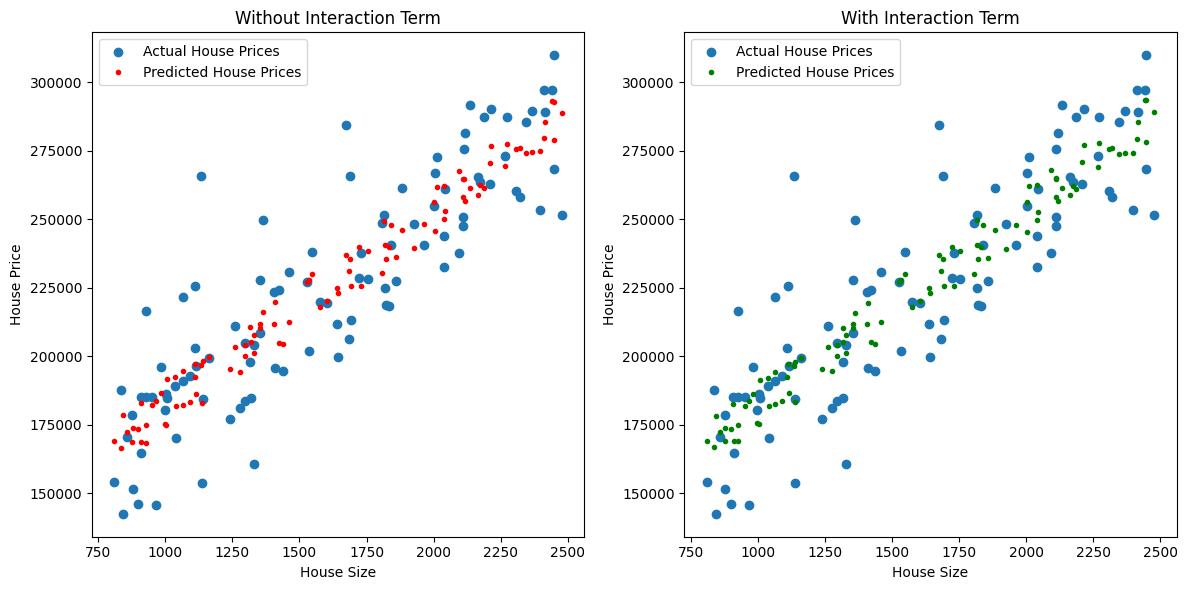

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate random data for demonstration
np.random.seed(42)
num_houses = 100
house_size = np.random.uniform(800, 2500, num_houses)
neighborhood_quality = np.random.uniform(1, 10, num_houses)
house_price = 100000 + 75 * house_size + 500 * neighborhood_quality + np.random.normal(0, 20000, num_houses)

# Create a DataFrame
data = pd.DataFrame({'HouseSize': house_size, 'NeighborhoodQuality': neighborhood_quality, 'HousePrice': house_price})

# Create an interaction term by multiplying HouseSize and NeighborhoodQuality
data['InteractionTerm'] = data['HouseSize'] * data['NeighborhoodQuality']

# Fit a linear regression model with and without the interaction term
model_without_interaction = LinearRegression()
model_without_interaction.fit(data[['HouseSize', 'NeighborhoodQuality']], data['HousePrice'])

model_with_interaction = LinearRegression()
model_with_interaction.fit(data[['HouseSize', 'NeighborhoodQuality', 'InteractionTerm']], data['HousePrice'])

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot without interaction term
plt.subplot(1, 2, 1)
plt.scatter(data['HouseSize'], data['HousePrice'], label='Actual House Prices')
plt.plot(data['HouseSize'], model_without_interaction.predict(data[['HouseSize', 'NeighborhoodQuality']]), 'r.', label='Predicted House Prices')
plt.title('Without Interaction Term')
plt.xlabel('House Size')
plt.ylabel('House Price')
plt.legend()

# Print MSE for model without interaction term
mse_without_interaction = mean_squared_error(data['HousePrice'], model_without_interaction.predict(data[['HouseSize', 'NeighborhoodQuality']]))
print(f"MSE without interaction term: {mse_without_interaction}")

# Plot with interaction term
plt.subplot(1, 2, 2)
plt.scatter(data['HouseSize'], data['HousePrice'], label='Actual House Prices')
plt.plot(data['HouseSize'], model_with_interaction.predict(data[['HouseSize', 'NeighborhoodQuality', 'InteractionTerm']]), 'g.', label='Predicted House Prices')
plt.title('With Interaction Term')
plt.xlabel('House Size')
plt.ylabel('House Price')
plt.legend()

# Print MSE for model with interaction term
mse_with_interaction = mean_squared_error(data['HousePrice'], model_with_interaction.predict(data[['HouseSize', 'NeighborhoodQuality', 'InteractionTerm']]))
print(f"MSE with interaction term: {mse_with_interaction}")

plt.tight_layout()
plt.show()



###2.3.3. **Binning or Discretization**
 Transforming continuous features into discrete bins or categories can help capture non-linear relationships and make the model more robust to outliers.

   ```python
   df['binned_feature'] = pd.cut(df['continuous_feature'], bins=5, labels=False)
   ```



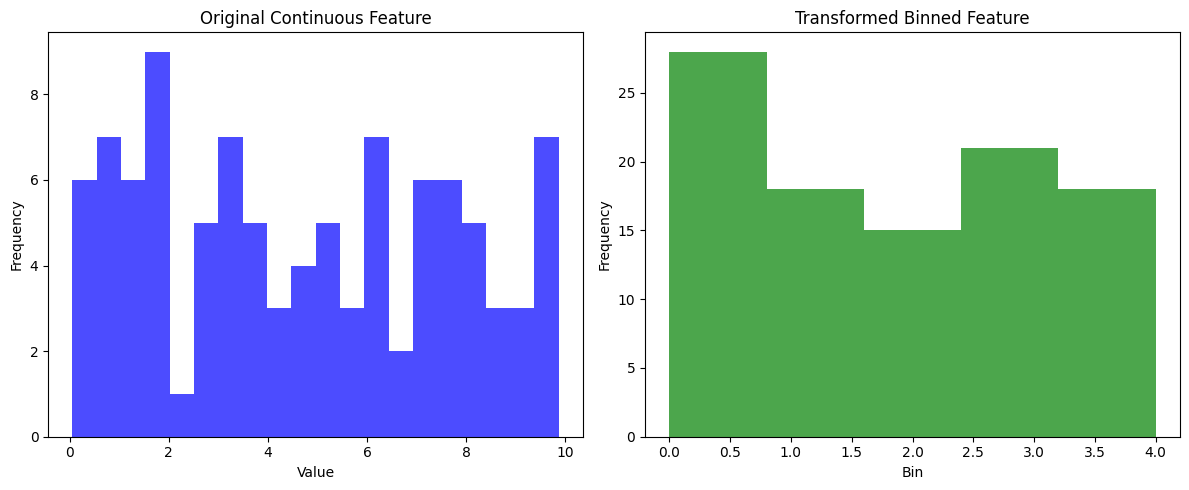

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
continuous_feature = 10 * np.random.rand(100)

# Create a DataFrame
df = pd.DataFrame({'continuous_feature': continuous_feature})

# Transform continuous feature into discrete bins
df['binned_feature'] = pd.cut(df['continuous_feature'], bins=5, labels=False)

# Plot the original and binned features
plt.figure(figsize=(12, 5))

# Plot the original continuous feature
plt.subplot(1, 2, 1)
plt.hist(df['continuous_feature'], bins=20, color='blue', alpha=0.7)
plt.title('Original Continuous Feature')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Plot the transformed binned feature
plt.subplot(1, 2, 2)
plt.hist(df['binned_feature'], bins=5, color='green', alpha=0.7)
plt.title('Transformed Binned Feature')
plt.xlabel('Bin')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


###2.3.4. **Encoding Cyclical Features**
 When dealing with cyclical features like time or angles, it's essential to encode them properly to preserve their cyclical nature.

   ```python
   df['sin_time'] = np.sin(2 * np.pi * df['time'] / 24)
   df['cos_time'] = np.cos(2 * np.pi * df['time'] / 24)
   ```



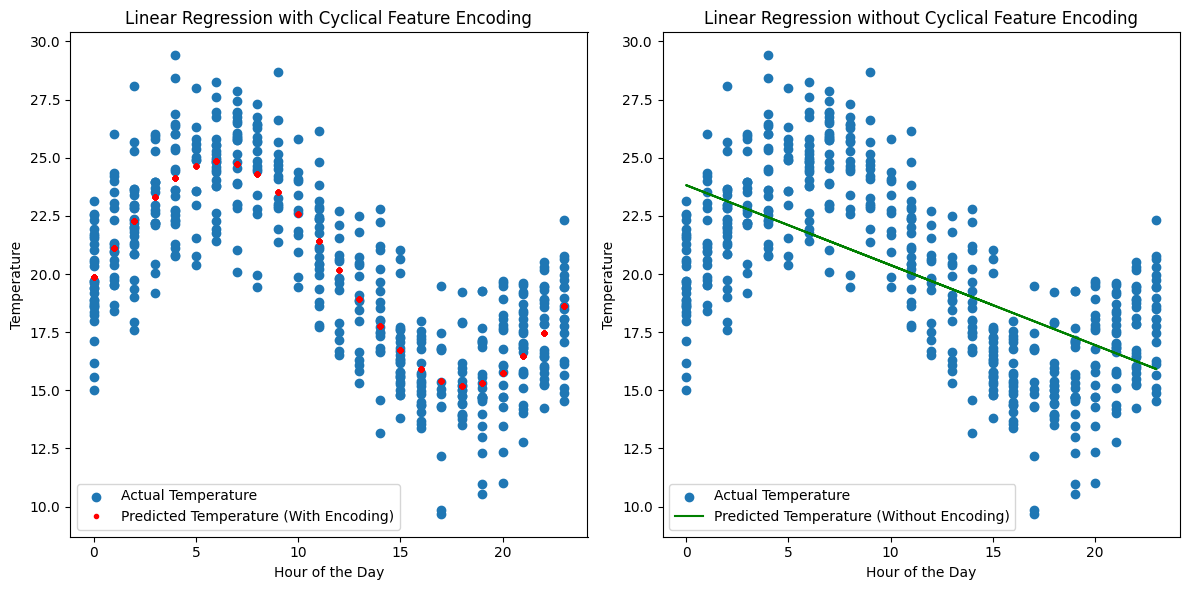

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# Generate random data for demonstration
np.random.seed(42)
num_samples = 500
timestamps = np.random.choice(np.arange(24), num_samples)  # Representing hours of the day
temperature = 20 + 5 * np.sin(2 * np.pi * timestamps / 24) + np.random.normal(0, 2, num_samples)

# Create a DataFrame
data = pd.DataFrame({'Timestamps': timestamps, 'Temperature': temperature})

# Encode cyclical feature (hour of the day) properly
data['HourSin'] = np.sin(2 * np.pi * data['Timestamps'] / 24)
data['HourCos'] = np.cos(2 * np.pi * data['Timestamps'] / 24)

# Fit a linear regression model using the encoded features
model_with_encoding = LinearRegression()
model_with_encoding.fit(data[['HourSin', 'HourCos']], data['Temperature'])

# Fit a linear regression model without encoding
model_without_encoding = LinearRegression()
model_without_encoding.fit(data[['Timestamps']], data['Temperature'])

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot with encoding
plt.subplot(1, 2, 1)
plt.scatter(data['Timestamps'], data['Temperature'], label='Actual Temperature')
plt.plot(data['Timestamps'], model_with_encoding.predict(data[['HourSin', 'HourCos']]), "r.", label='Predicted Temperature (With Encoding)')
plt.title('Linear Regression with Cyclical Feature Encoding')
plt.xlabel('Hour of the Day')
plt.ylabel('Temperature')
plt.legend()

# Plot without encoding
plt.subplot(1, 2, 2)
plt.scatter(data['Timestamps'], data['Temperature'], label='Actual Temperature')
plt.plot(data['Timestamps'], model_without_encoding.predict(data[['Timestamps']]), color='green', label='Predicted Temperature (Without Encoding)')
plt.title('Linear Regression without Cyclical Feature Encoding')
plt.xlabel('Hour of the Day')
plt.ylabel('Temperature')
plt.legend()

plt.tight_layout()
plt.show()


###2.3.5. **Domain-Specific Features:**
 Incorporating domain-specific knowledge to create new features that capture important aspects of the problem can lead to more meaningful representations.

 In the following example, we generate random data for house prices, latitude, and longitude. We then create a new feature called 'DistanceToCityCenter' using a hypothetical function calculate_distance. Finally, we fit a linear regression model using the original latitude and longitude features along with the newly created 'DistanceToCityCenter' feature.

This illustrates how incorporating domain-specific knowledge (in this case, knowledge about the importance of distance to the city center) can lead to more meaningful features and potentially improve the model's performance.

   ```python
   # Creating a feature based on domain knowledge
   df['distance_to_city_center'] = calculate_distance(df['latitude'], df['longitude'], city_center_coords)
   ```


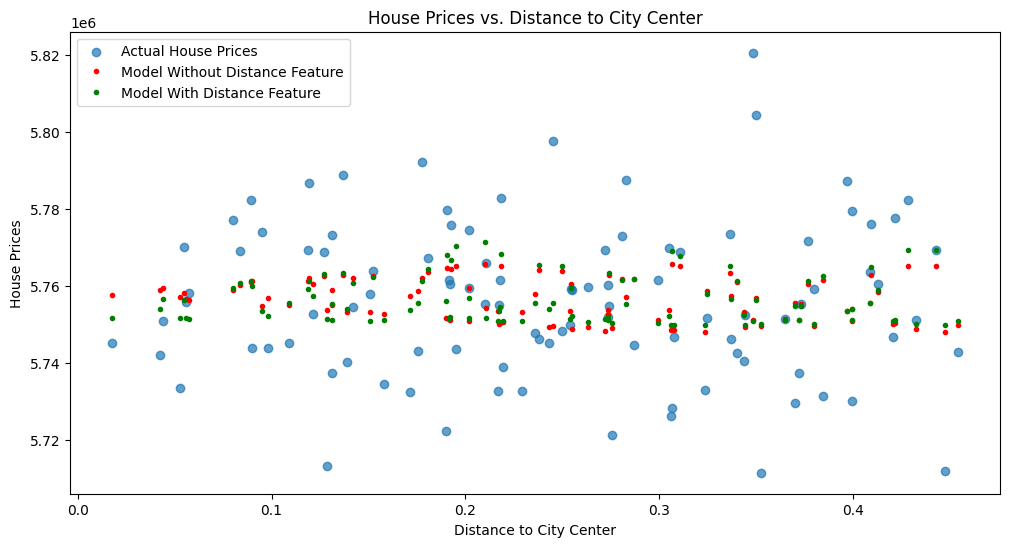

MSE without Distance Feature: 378268724.88005537
MSE with Distance Feature: 372223186.4735476


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Function to calculate distance between two sets of coordinates
def calculate_distance(lat1, lon1, lat2, lon2):
    # For simplicity, we use a Euclidean distance formula
    return np.sqrt((lat1 - lat2)**2 + (lon1 - lon2)**2)

# Generate random data for demonstration
np.random.seed(42)
num_houses = 100
latitude = np.random.uniform(37.5, 38, num_houses)  # Random latitude values for a city
longitude = np.random.uniform(-122.5, -122, num_houses)  # Random longitude values for a city
house_prices = 200000 + 50000 * latitude - 30000 * longitude + np.random.normal(0, 20000, num_houses)

# Create a DataFrame
data = pd.DataFrame({'Latitude': latitude, 'Longitude': longitude, 'HousePrices': house_prices})

# Assume city center coordinates
city_center_coords = {'latitude': 37.7749, 'longitude': -122.4194}

# Create a new feature based on domain knowledge (distance to city center)
data['DistanceToCityCenter'] = calculate_distance(data['Latitude'], data['Longitude'], city_center_coords['latitude'], city_center_coords['longitude'])

# Fit a linear regression model using the original and new features
model_without_distance = LinearRegression()
model_without_distance.fit(data[['Latitude', 'Longitude']], data['HousePrices'])

model_with_distance = LinearRegression()
model_with_distance.fit(data[['Latitude', 'Longitude', 'DistanceToCityCenter']], data['HousePrices'])

# Plotting the results
plt.figure(figsize=(12, 6))

# Scatter plot with distance to city center
plt.scatter(data['DistanceToCityCenter'], data['HousePrices'], label='Actual House Prices', alpha=0.7)

# Plot model without distance feature
plt.plot(data['DistanceToCityCenter'], model_without_distance.predict(data[['Latitude', 'Longitude']]), "r.", label='Model Without Distance Feature')

# Plot model with distance feature
plt.plot(data['DistanceToCityCenter'], model_with_distance.predict(data[['Latitude', 'Longitude', 'DistanceToCityCenter']]), "g.", label='Model With Distance Feature')

plt.title('House Prices vs. Distance to City Center')
plt.xlabel('Distance to City Center')
plt.ylabel('House Prices')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error

# Predictions for models
predictions_without_distance = model_without_distance.predict(data[['Latitude', 'Longitude']])
predictions_with_distance = model_with_distance.predict(data[['Latitude', 'Longitude', 'DistanceToCityCenter']])

# Calculate MSE for both models
mse_without_distance = mean_squared_error(data['HousePrices'], predictions_without_distance)
mse_with_distance = mean_squared_error(data['HousePrices'], predictions_with_distance)

# Print MSE for both models
print(f"MSE without Distance Feature: {mse_without_distance}")
print(f"MSE with Distance Feature: {mse_with_distance}")

##2.4 Handling outliers or extreme values.

Handling outliers or extreme values is an important step in the data preprocessing phase to ensure that the presence of unusual data points does not unduly influence the results of statistical analyses or machine learning models. Here are some common techniques for handling outliers:

1. **Identifying Outliers:**
   - Visual Inspection: Use scatter plots, box plots, or histograms to visually identify potential outliers.
   - Statistical Methods: Employ statistical methods such as Z-scores or IQR (Interquartile Range) to identify values that deviate significantly from the mean.

2. **Transformations:**
   - Log Transformation: Applying a logarithmic transformation to the data can compress the range and mitigate the impact of extreme values.
   - Box-Cox Transformation: Similar to log transformation but can handle zero and negative values.

3. **Winsorizing:**
   - Winsorizing involves setting extreme values to a specified percentile. For example, capping the values at the 1st and 99th percentiles can help mitigate the impact of outliers.

4. **Imputation:**
   - For cases where outliers cannot be removed, consider imputing or replacing them with a more representative value. This can be the mean, median, or a value derived from a regression model.

5. **Data Truncation:**
   - Truncate the dataset by removing extreme values beyond a certain threshold. This can be done by specifying a range for the variable.

6. **Robust Statistical Methods:**
   - Use robust statistical methods that are less sensitive to outliers, such as the median and median absolute deviation (MAD).

7. **Machine Learning Models:**
   - Certain machine learning algorithms are inherently robust to outliers. For example, tree-based models like Random Forests and Gradient Boosting are less affected by outliers.

8. **Data Segmentation:**
   - Segment the data into subsets based on certain criteria, and model each subset separately. This can help capture the variability within different segments.

9. **Domain Knowledge:**
   - Leverage domain knowledge to identify whether certain values are genuine outliers or valid data points. In some cases, extreme values may have significance and should not be treated as errors.

10. **Flagging or Special Treatment:**
   - Create a binary indicator variable to flag observations with extreme values, allowing models to treat them differently during analysis.

It's important to note that the choice of method depends on the specific characteristics of the data and the problem at hand. It's often advisable to try multiple approaches and evaluate their impact on the model's performance. Additionally, the decision to handle or retain outliers may depend on the goals of the analysis or modeling task.

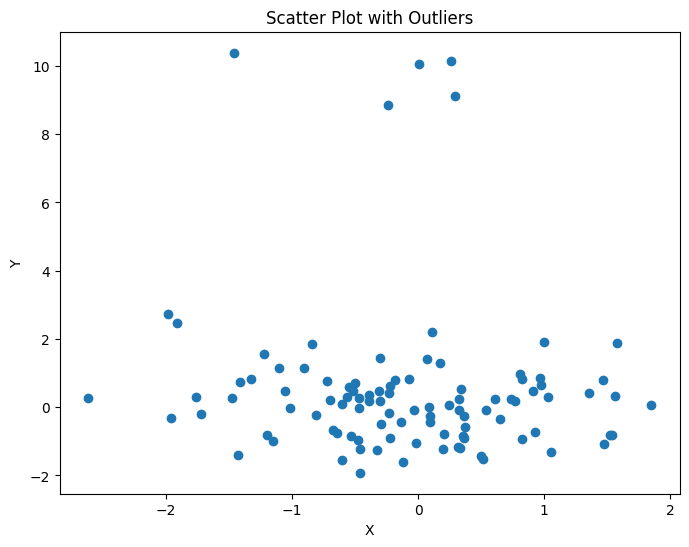

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate a dataset with outliers
np.random.seed(42)
data = pd.DataFrame({'X': np.random.normal(0, 1, 100), 'Y': np.random.normal(0, 1, 100)})

# Introduce outliers
data.iloc[95:100, 1] += 10  # Adding outliers to the 'Y' variable

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['X'], data['Y'])
plt.title('Scatter Plot with Outliers')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
